In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Set up the ChEMBL client
chembl_client = new_client


In [2]:
def smiles_to_chembl_id(smiles):
    try:
        molecule = chembl_client.molecule
        result = molecule.filter(smiles=smiles).only("chembl_id")
        return result[0]["chembl_id"] if result else None
    except Exception as e:
        print(f"Error converting SMILES to ChEMBL ID for {smiles}: {e}")
        return None


In [3]:
def get_bioactivities_for_chembl_id(chembl_id):
    try:
        # Verify the molecule exists with the given ChEMBL ID
        molecule = chembl_client.molecule
        compound_info_list = list(molecule.filter(molecule_chembl_id=chembl_id).only("molecule_chembl_id"))
        
        if not compound_info_list:
            print(f"ChEMBL ID {chembl_id} not found in the database.")
            return None

        # Fetch bioactivity data associated with the molecule
        bioactivities = chembl_client.activity.filter(
            molecule_chembl_id=chembl_id
        )

        bioactivities_list = list(bioactivities)
        
        # Fetch gene names for the targets and augment the bioactivity records
        for activity in bioactivities_list:
            
            target_id = activity["target_chembl_id"]
            target_data = chembl_client.target.filter(target_chembl_id=target_id).only("target_components")
            
            if target_data and target_data[0].get("target_components"):
                # Assuming the first component is the primary gene; modify as needed
                gene_symbol = next((synonym['component_synonym'] 
                   for synonym in target_data[0]['target_components'][0]['target_component_synonyms'] 
                   if synonym['syn_type'] == 'GENE_SYMBOL'), None)
                
                activity["gene_symbol"] = gene_symbol
            else:
                activity["gene_symbol"] = None
        return bioactivities_list
        
    except Exception as e:
        print(f"Error retrieving targets for ChEMBL ID {chembl_id}: {e}")
        return None

In [4]:
jumpcp = pd.read_csv("mitotox_chemblidentifiers.csv.gz", compression="gzip")
jumpcp = jumpcp[jumpcp.ChEMBL_ID.notna()].reset_index(drop=True)
jumpcp

,Smiles,Standardized_SMILES_chembl,Standardized_InChI_chembl,Standardized_InChIKey_chembl,ChEMBL_ID
0,[O-][N+](=O)c1ccc2oc(nc2c1)-c1ccccc1,O=[N+]([O-])c1ccc2oc(-c3ccccc3)nc2c1,InChI=1S/C13H8N2O3/c16-15(17)10-6-7-12-11(8-10...,PBRISAFILDFQFS-UHFFFAOYSA-N,CHEMBL391351
1,C[C@@H](CO)N1C[C@H](C)[C@@H](CN(C)C(=O)Nc2cccc...,C[C@H]1CN([C@@H](C)CO)C(=O)CCCn2cc(nn2)CO[C@@H...,InChI=1S/C23H33FN6O4/c1-16-11-30(17(2)14-31)22...,VTXUSJLMEZRIOV-XGHQBKJUSA-N,CHEMBL2131431
2,CCSc1nn2c(nc3ccccc3c2=O)s1,CCSc1nn2c(=O)c3ccccc3nc2s1,InChI=1S/C11H9N3OS2/c1-2-16-11-13-14-9(15)7-5-...,ANBICWUKCFLASK-UHFFFAOYSA-N,CHEMBL1469668
3,Oc1ccc(C(=O)Cc2c(F)cccc2Cl)c(O)c1,O=C(Cc1c(F)cccc1Cl)c1ccc(O)cc1O,InChI=1S/C14H10ClFO3/c15-11-2-1-3-12(16)10(11)...,ZDTYYXLZABVGDD-UHFFFAOYSA-N,CHEMBL1563942
4,CCc1ccc(\C=C(\C#N)C(N)=S)cc1,CCc1ccc(/C=C(/C#N)C(N)=S)cc1,InChI=1S/C12H12N2S/c1-2-9-3-5-10(6-4-9)7-11(8-...,SGVLLSTVURBKHH-XFFZJAGNSA-N,CHEMBL1382221
5,Clc1ccc(NC(=S)NCCc2ccccc2)cc1,S=C(NCCc1ccccc1)Nc1ccc(Cl)cc1,InChI=1S/C15H15ClN2S/c16-13-6-8-14(9-7-13)18-1...,KSLZSPRUTHUAOA-UHFFFAOYSA-N,CHEMBL1548970
6,Cc1cc(C)n(CC(O)CN(c2ccc(C)cc2)S(=O)(=O)c2ccc3c...,Cc1ccc(N(CC(O)Cn2nc(C)cc2C)S(=O)(=O)c2ccc3cccc...,InChI=1S/C25H27N3O3S/c1-18-8-11-23(12-9-18)28(...,WHVQUFOUFLVPRB-UHFFFAOYSA-N,CHEMBL1366886
7,O=C(N1C(=O)c2cccc3cccc1c23)c1ccco1,O=C(c1ccco1)N1C(=O)c2cccc3cccc1c23,InChI=1S/C16H9NO3/c18-15-11-6-1-4-10-5-2-7-12(...,ZRZBTHCAIRVGTE-UHFFFAOYSA-N,CHEMBL1524294
8,Brc1ccc(CSc2ccc(nn2)-c2ccco2)cc1,Brc1ccc(CSc2ccc(-c3ccco3)nn2)cc1,InChI=1S/C15H11BrN2OS/c16-12-5-3-11(4-6-12)10-...,GHTDIOSUORRDJH-UHFFFAOYSA-N,CHEMBL1572364
9,CCCNC(=O)C[C@@H]1CC[C@H]2[C@H](COc3ccc(NC(=O)c...,CCCNC(=O)C[C@@H]1CC[C@H]2[C@H](COc3ccc(NC(=O)c...,InChI=1S/C27H31N3O7/c1-3-10-28-25(31)13-18-6-7...,OHHWUSSTVAUIQP-WXVUKLJWSA-N,CHEMBL2356652


In [5]:
jumpcp.ChEMBL_ID.unique()[:10]


array(['CHEMBL391351', 'CHEMBL2131431', 'CHEMBL1469668', 'CHEMBL1563942',
       'CHEMBL1382221', 'CHEMBL1548970', 'CHEMBL1366886', 'CHEMBL1524294',
       'CHEMBL1572364', 'CHEMBL2356652'], dtype=object)

In [6]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=80)

# List of ChEMBL IDs
chembl_ids = jumpcp.ChEMBL_ID.unique()[:]


# Use parallel_apply to retrieve data for each ChEMBL ID in parallel
dfs = pd.Series(chembl_ids).parallel_apply(get_bioactivities_for_chembl_id)


INFO: Pandarallel will run on 80 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [8]:
# Convert each list of dictionaries in dfs to a DataFrame
dfs_list = [pd.DataFrame(data_dict) for data_dict in dfs]

# Concatenate all the DataFrames
final_df = pd.concat(dfs_list, ignore_index=True)
final_df

/tmp/ipykernel_5440/3415553419.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(dfs_list, ignore_index=True)


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,gene_symbol
0,None,None,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,None,None,BAO_0002146,...,Candida albicans,5476,None,NaN,-Log MIC,None,UO_0000065,None,4.282,None
1,None,None,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,None,None,BAO_0002146,...,Klebsiella pneumoniae,573,None,NaN,MIC,ug ml-1,UO_0000274,None,50.0,None
2,None,None,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,None,None,BAO_0002146,...,Klebsiella pneumoniae,573,None,NaN,MIC,ug ml-1,UO_0000274,None,100.0,None
3,None,None,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,None,None,BAO_0002146,...,Escherichia coli,562,None,NaN,MIC,ug ml-1,UO_0000274,None,50.0,None
4,None,None,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,None,None,BAO_0002146,...,Escherichia coli,562,None,NaN,MIC,ug ml-1,UO_0000274,None,50.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,"{'action_type': 'INHIBITOR', 'description': 'N...",Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,None,None,BAO_0000201,...,Galectin-3,9606,None,NaN,INH,None,UO_0000187,None,None,LGALS3
37792,None,None,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,None,None,BAO_0000201,...,Histone deacetylase 6,9606,None,NaN,inhibition,%,UO_0000187,None,4.18,HDAC6
37793,None,None,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,None,None,BAO_0000201,...,Histone deacetylase 6,9606,None,NaN,inhibition,%,UO_0000187,None,-4.34,HDAC6
37794,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,None,None,BAO_0000190,...,Unchecked,None,None,NaN,IC50,nM,UO_0000065,None,0.37,None


In [9]:
final_df.to_csv("all_activities_chembl_mitotox.csv.gz", index=False, compression='gzip')

In [29]:
final_df = pd.read_csv("all_activities_chembl_mitotox.csv.gz", compression='gzip')

/tmp/ipykernel_5440/4043102379.py:1: DtypeWarning: Columns (7,8,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv("all_activities_chembl_mitotox.csv.gz", compression='gzip')


In [30]:
final_df.standard_relation.unique()

array(['=', nan, '>', '<', '<=', '>=', '~'], dtype=object)

In [31]:
final_df = final_df[~final_df["standard_relation"].isin(['>', '<', '~', '>=', '<=', '>>'])]
final_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,gene_symbol
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,Candida albicans,5476.0,NaN,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,Klebsiella pneumoniae,573.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,Klebsiella pneumoniae,573.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,Escherichia coli,562.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,Escherichia coli,562.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,"{'action_type': 'INHIBITOR', 'description': 'N...",Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,Galectin-3,9606.0,NaN,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,Histone deacetylase 6,9606.0,NaN,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,Histone deacetylase 6,9606.0,NaN,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6
37794,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,Unchecked,NaN,NaN,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN


In [32]:
final_df = final_df[final_df["activity_comment"].str.lower()!="inconclusive"]
final_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,gene_symbol
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,Candida albicans,5476.0,NaN,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,Klebsiella pneumoniae,573.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,Klebsiella pneumoniae,573.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,Escherichia coli,562.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,Escherichia coli,562.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,"{'action_type': 'INHIBITOR', 'description': 'N...",Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,Galectin-3,9606.0,NaN,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,Histone deacetylase 6,9606.0,NaN,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,Histone deacetylase 6,9606.0,NaN,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6
37794,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,Unchecked,NaN,NaN,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN


In [43]:
final_df[["standard_type"]].value_counts()

standard_type        
Tissue Severity Score    2900
MIC                      2772
IC50                     2437
Activity                 2328
Ki                       1580
                         ... 
Lethality                   1
Liver CH levels             1
Liver TG                    1
SC50                        1
LED100                      1
Name: count, Length: 459, dtype: int64

In [44]:
import pandas as pd
import ast

# Convert the string representation of dictionary to an actual dictionary (if required)
final_df['action_type'] = final_df['action_type'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
final_df

/tmp/ipykernel_5440/2256060974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['action_type'] = final_df['action_type'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,gene_symbol
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,Candida albicans,5476.0,NaN,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,Klebsiella pneumoniae,573.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,Klebsiella pneumoniae,573.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,Escherichia coli,562.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,Escherichia coli,562.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,"{'action_type': 'INHIBITOR', 'description': 'N...",Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,Galectin-3,9606.0,NaN,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,Histone deacetylase 6,9606.0,NaN,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,Histone deacetylase 6,9606.0,NaN,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6
37794,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,Unchecked,NaN,NaN,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN


In [45]:
# Extract dictionary values to separate columns
expanded_data = final_df['action_type'].apply(pd.Series)
expanded_data

,0,action_type,description,parent_type
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
37791,NaN,INHIBITOR,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR
37792,NaN,NaN,NaN,NaN
37793,NaN,NaN,NaN,NaN
37794,NaN,INHIBITOR,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR


In [46]:
final_df["action_type"] = expanded_data["action_type"] 
final_df["description"] = expanded_data["description"] 
final_df["parent_type"] = expanded_data["parent_type"] 
final_df

/tmp/ipykernel_5440/3071467124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["action_type"] = expanded_data["action_type"]
/tmp/ipykernel_5440/3071467124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["description"] = expanded_data["description"]
/tmp/ipykernel_5440/3071467124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,text_value,toid,type,units,uo_units,upper_value,value,gene_symbol,description,parent_type
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,NaN,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN,NaN,NaN
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN,NaN,NaN
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,INHIBITOR,Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,NaN,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,NaN,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6,NaN,NaN
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,NaN,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6,NaN,NaN
37794,INHIBITOR,NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,NaN,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR


In [47]:
def clean_activity_comment(value):
    value_str = str(value).lower()
    
    if 'inhibitor' in value_str:
        return 'inhibitor'
    elif 'inactive' in value_str or 'not active' in value_str:
        return 'inactive'
    elif 'active' in value_str:
        return 'active' 
    elif 'substrate' in value_str:
        return 'substrate'
    elif 'antagonist' in value_str:
        return 'antagonist'
    elif 'inverse agonist' in value_str:
        return 'inverse agonist'
    elif 'agonist' in value_str:
        return 'agonist'
    elif pd.isna(value) or 'nan' in value_str:
        return 'no data'
    else:
        return 'unknown'

final_df['activity_comment_class'] = final_df['activity_comment'].apply(clean_activity_comment)
final_df['action_type'] = final_df['action_type'].str.lower()
final_df

/tmp/ipykernel_5440/3856125844.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['activity_comment_class'] = final_df['activity_comment'].apply(clean_activity_comment)
/tmp/ipykernel_5440/3856125844.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['action_type'] = final_df['action_type'].str.lower()


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,gene_symbol,description,parent_type,activity_comment_class
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN,NaN,NaN,no data
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN,NaN,NaN,no data
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,inhibitor,Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,unknown
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6,NaN,NaN,no data
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6,NaN,NaN,no data
37794,inhibitor,NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,no data


In [48]:
final_df.action_type.value_counts()

action_type
inhibitor                        232
substrate                         77
positive allosteric modulator     31
stabiliser                        19
antagonist                        11
blocker                            8
agonist                            8
binding agent                      6
disrupting agent                   5
chelating agent                    2
activator                          1
Name: count, dtype: int64

In [49]:
final_df.activity_comment_class.value_counts()

activity_comment_class
unknown       17301
no data       11546
inactive       3595
active          769
antagonist      196
agonist          88
substrate        29
inhibitor        27
Name: count, dtype: int64

In [50]:
import numpy as np

# Create the mask
mask = final_df['pchembl_value'].isna() ^ final_df['value'].isna()

# Apply the computation
def calculate_pchembl(row):
    if row['standard_value'] == 0:
        return np.nan  # or some other placeholder value
    elif row['standard_units'] == 'µM':
        return -np.log10(row['standard_value'] * 10**-6)
    elif row['standard_units'] == 'nM':
        return -np.log10(row['standard_value'] * 10**-9)
    else:
        return np.nan  # Discard if %

final_df.loc[mask, 'pchembl_value'] = final_df[mask].apply(calculate_pchembl, axis=1)

final_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,gene_symbol,description,parent_type,activity_comment_class
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN,NaN,NaN,no data
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN,NaN,NaN,no data
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,inhibitor,Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,unknown
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6,NaN,NaN,no data
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6,NaN,NaN,no data
37794,inhibitor,NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,no data


In [51]:
# Replace 'no data' values based on the condition
final_df.loc[(final_df['activity_comment_class'] == 'no data') & (final_df['pchembl_value'] > 6.5), 'activity_comment_class'] = 'active'
final_df.loc[(final_df['activity_comment_class'] == 'no data') & (final_df['pchembl_value'] <= 6.5), 'activity_comment_class'] = 'inactive'

# Replace 'unknown' values based on the condition
final_df.loc[(final_df['activity_comment_class'] == 'unknown') & (final_df['pchembl_value'] > 6.5), 'activity_comment_class'] = 'active'
final_df.loc[(final_df['activity_comment_class'] == 'unknown') & (final_df['pchembl_value'] <= 6.5), 'activity_comment_class'] = 'inactive'

final_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,gene_symbol,description,parent_type,activity_comment_class
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN,NaN,NaN,inactive
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN,NaN,NaN,no data
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,inhibitor,Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,unknown
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6,NaN,NaN,no data
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6,NaN,NaN,no data
37794,inhibitor,NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,active


In [52]:
final_df.activity_comment_class.value_counts()

activity_comment_class
unknown       17111
no data        9651
inactive       5352
active         1097
antagonist      196
agonist          88
substrate        29
inhibitor        27
Name: count, dtype: int64

In [53]:
final_df.action_type.value_counts()

action_type
inhibitor                        232
substrate                         77
positive allosteric modulator     31
stabiliser                        19
antagonist                        11
blocker                            8
agonist                            8
binding agent                      6
disrupting agent                   5
chelating agent                    2
activator                          1
Name: count, dtype: int64

In [54]:
target_actions = ['activator', 'substrate', 'agonist', 'inhibitor',
       'antagonist', 'degrader', 'partial agonist',
       'positive allosteric modulator', 'stabiliser', 'inverse agonist',
       'modulator', 'blocker', 'negative allosteric modulator',
       'binding agent', 'disrupting agent']

# Identify rows where action_type is in target_actions and activity_comment_class is not "active"
mask = (final_df['action_type'].isin(target_actions)) & (final_df['activity_comment_class'] == 'inactive')

# Store these rows in a new dataframe for manual check
rows_to_check = final_df[mask].copy()

# Update 'activity_comment_class' in the original dataframe
final_df.loc[mask, 'activity_comment_class'] = final_df['action_type']

print("Rows to manually check:")
rows_to_check

Rows to manually check:


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,gene_symbol,description,parent_type,activity_comment_class
1160,blocker,NaN,25100646,[],CHEMBL5261312,Binding affinity to C-terminal amidated influe...,B,NaN,NaN,BAO_0000034,...,NaN,Kd,uM,UO_0000065,NaN,0.51,M,Negatively effects the normal functioning of a...,NEGATIVE MODULATOR,inactive
4779,binding agent,NaN,22850812,[],CHEMBL4723535,Displacement of [3H]DTG from sigma 2 receptor ...,B,NaN,NaN,BAO_0000192,...,NaN,Ki,nM,UO_0000065,NaN,5410.00,Tmem97,Binds to a substance such as a cell surface an...,OTHER,inactive
4782,inhibitor,NaN,22967028,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4769734,Inhibition of human plasma AChE using acetylth...,B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,73.30,ACHE,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inactive
6783,inhibitor,NaN,23161574,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4812531,Inhibition of NS2B-NS3 protease in DENV2proHeL...,B,NaN,NaN,BAO_0000188,...,NaN,EC50,uM,UO_0000065,NaN,7.10,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inactive
6787,stabiliser,NaN,23262932,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4833458,Binding affinity to TTR V3OM mutant (unknown o...,B,P02766,V50M,BAO_0000034,...,NaN,Kd(app),uM,UO_0000065,NaN,0.98,TTR,Increases the conformational stability of a pr...,OTHER,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37586,inhibitor,NaN,24988975,[],CHEMBL5229097,Inhibition of Mycobacterium tuberculosis MetAP1c,B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,11.16,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inactive
37587,inhibitor,NaN,24988977,[],CHEMBL5229098,Inhibition of human MetAP1,B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,84.70,METAP1,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inactive
37588,inhibitor,NaN,24988979,[],CHEMBL5229099,Inhibition of human MetAP2,B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,80.40,METAP2,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inactive
37593,inhibitor,NaN,25094792,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5259720,Inhibition of MMP-14 (unknown origin) using 5-...,B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,26.90,MMP14,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inactive


In [55]:
# Update 'activity_comment_class'
final_df.loc[final_df['action_type'].isin(target_actions), 'activity_comment_class'] = final_df['action_type']
final_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,gene_symbol,description,parent_type,activity_comment_class
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN,NaN,NaN,inactive
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN,NaN,NaN,no data
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,inhibitor,Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inhibitor
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6,NaN,NaN,no data
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6,NaN,NaN,no data
37794,inhibitor,NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inhibitor


In [56]:
final_df.activity_comment_class.value_counts()

activity_comment_class
unknown                          17053
no data                           9537
inactive                          5261
active                            1039
inhibitor                          235
antagonist                         184
agonist                             87
substrate                           85
positive allosteric modulator       31
stabiliser                          19
blocker                              8
binding agent                        6
disrupting agent                     5
activator                            1
Name: count, dtype: int64

In [57]:
final_df.type.value_counts()

type
Tissue Severity Score    2900
MIC                      2769
IC50                     2391
Activity                 2328
Ki                       1568
                         ... 
Onset for sleep, min        1
Sleeping time               1
C                           1
Toxicity                    1
PIC seizure                 1
Name: count, Length: 530, dtype: int64

In [58]:
final_df.standard_units.value_counts()

standard_units
%              8198
ug.mL-1        6223
nM             2805
cells.uL-1      956
g               819
               ... 
mmHg hr-1         1
ppm               1
mm2               1
10'7No_unit       1
nm/s              1
Name: count, Length: 136, dtype: int64

In [59]:
# Check for rows where one column has NaN but the other doesn't
mask = final_df['pchembl_value'].isna() ^ final_df['value'].isna()  # The ^ operator is a bitwise XOR, it returns True when the two conditions are different

rows_with_issue = final_df[mask]

print("Rows with issue:")
rows_with_issue[['value', 'pchembl_value', 'type', 'standard_units', 'activity_comment_class']].activity_comment_class.value_counts()

Rows with issue:


activity_comment_class
unknown                          13155
no data                           9464
antagonist                         173
inhibitor                          107
agonist                             84
inactive                            60
positive allosteric modulator       27
active                              12
blocker                              7
stabiliser                           6
binding agent                        1
Name: count, dtype: int64

In [60]:
rows_with_issue[['standard_value', 'pchembl_value', 'type', 'standard_units', 'activity_comment_class']]

,standard_value,pchembl_value,type,standard_units,activity_comment_class
1,50.00,NaN,MIC,ug.mL-1,no data
2,100.00,NaN,MIC,ug.mL-1,no data
3,50.00,NaN,MIC,ug.mL-1,no data
4,50.00,NaN,MIC,ug.mL-1,no data
5,25.00,NaN,MIC,ug.mL-1,no data
...,...,...,...,...,...
37789,50.00,NaN,INH,%,no data
37790,40.00,NaN,INH,%,no data
37792,4.18,NaN,inhibition,%,no data
37793,-4.34,NaN,inhibition,%,no data


In [61]:
final_df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value', 'gene_symbol',
       'description', 'parent_type', 'activity_comment_class'],
  

In [62]:
final_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,gene_symbol,description,parent_type,activity_comment_class
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN,NaN,NaN,inactive
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN,NaN,NaN,no data
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,inhibitor,Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inhibitor
37792,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6,NaN,NaN,no data
37793,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6,NaN,NaN,no data
37794,inhibitor,NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inhibitor


In [64]:
final_df = final_df.reset_index(drop=True)
final_df.to_csv("all_activities_chembl_mitotox_cleaned.csv.gz", index=False, compression='gzip')

In [65]:
final_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,gene_symbol,description,parent_type,activity_comment_class
0,NaN,NaN,1934687,[],CHEMBL892428,Antifungal activity against Candida albicans b...,F,NaN,NaN,BAO_0002146,...,NaN,-Log MIC,NaN,UO_0000065,NaN,4.282,NaN,NaN,NaN,inactive
1,NaN,NaN,2517929,[],CHEMBL974321,Antimicrobial activity against Klebsiella pneu...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
2,NaN,NaN,2517954,[],CHEMBL974322,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,100.000,NaN,NaN,NaN,no data
3,NaN,NaN,2517979,[],CHEMBL974323,Antimicrobial activity against Escherichia col...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
4,NaN,NaN,2518004,[],CHEMBL974324,Antimicrobial activity against multidrug-resis...,F,NaN,NaN,BAO_0002146,...,NaN,MIC,ug ml-1,UO_0000274,NaN,50.000,NaN,NaN,NaN,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33546,inhibitor,Dose-dependent effect,22895585,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4730438,Inhibition of galectin 3 in mouse BWZ cells tr...,B,NaN,NaN,BAO_0000201,...,NaN,INH,NaN,UO_0000187,NaN,NaN,LGALS3,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inhibitor
33547,NaN,NaN,23132709,[],CHEMBL4808149,Enzymatic assay of human HDAC6 with commercial...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,4.180,HDAC6,NaN,NaN,no data
33548,NaN,NaN,23136443,[],CHEMBL4808150,Enzymatic assay of human HDAC6 with custom pep...,B,NaN,NaN,BAO_0000201,...,NaN,inhibition,%,UO_0000187,NaN,-4.340,HDAC6,NaN,NaN,no data
33549,inhibitor,NaN,24776127,[],CHEMBL5128056,Inhibition of PDE10 (unknown origin),B,NaN,NaN,BAO_0000190,...,NaN,IC50,nM,UO_0000065,NaN,0.370,NaN,Negatively effects (inhibits) the normal funct...,NEGATIVE MODULATOR,inhibitor


In [66]:
final_df.canonical_smiles.nunique()

52

In [67]:
final_df.parent_molecule_chembl_id.nunique()

52

In [68]:
final_df.gene_symbol.nunique()

663

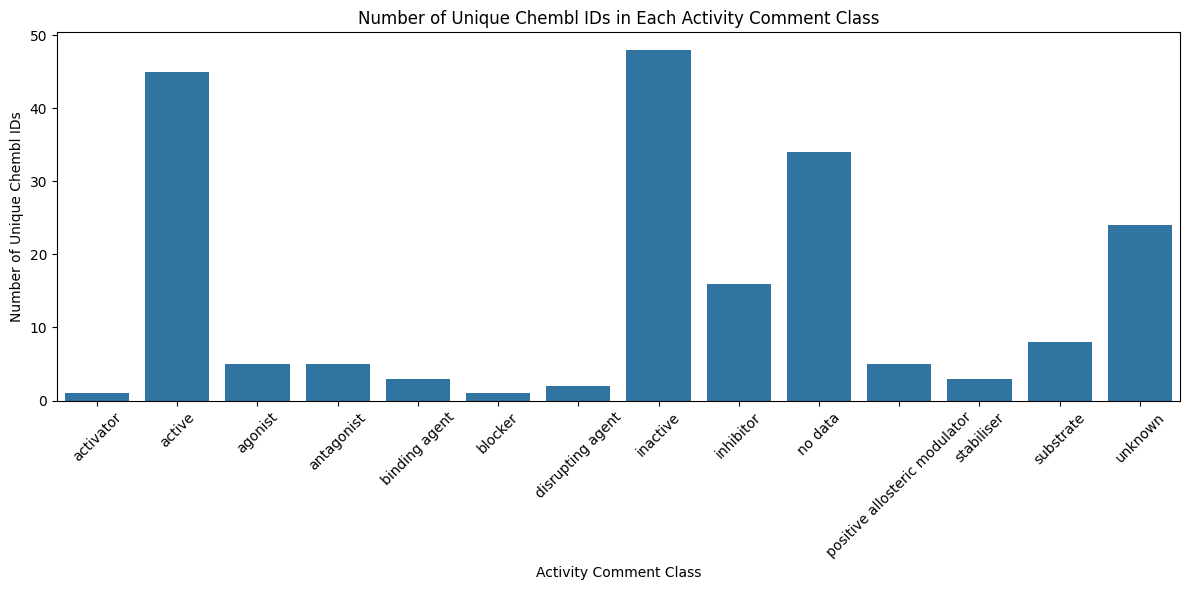

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'activity_comment_class' and get unique 'chembl_id's for each class
unique_chembl_counts = final_df.groupby('activity_comment_class')['parent_molecule_chembl_id'].nunique()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_chembl_counts.index, y=unique_chembl_counts.values)
plt.title('Number of Unique Chembl IDs in Each Activity Comment Class')
plt.ylabel('Number of Unique Chembl IDs')
plt.xlabel('Activity Comment Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
for gene in final_df.gene_symbol.unique():
    
    df = final_df[final_df['gene_symbol']==gene]
    print(df.activity_comment_class.value_counts())
    

Series([], Name: count, dtype: int64)
activity_comment_class
active    2
Name: count, dtype: int64
activity_comment_class
inactive    6
active      4
Name: count, dtype: int64
activity_comment_class
inactive    8
Name: count, dtype: int64
activity_comment_class
active    2
Name: count, dtype: int64
activity_comment_class
inactive    3
Name: count, dtype: int64
activity_comment_class
inactive    1
Name: count, dtype: int64
activity_comment_class
active      1
inactive    1
Name: count, dtype: int64
activity_comment_class
active    1
Name: count, dtype: int64
activity_comment_class
inactive    2
Name: count, dtype: int64
activity_comment_class
active      5
inactive    2
Name: count, dtype: int64
activity_comment_class
active      2
inactive    1
Name: count, dtype: int64
activity_comment_class
active      3
inactive    3
Name: count, dtype: int64
activity_comment_class
active    1
Name: count, dtype: int64
activity_comment_class
active      7
inactive    6
Name: count, dtype: int64
acti

In [71]:
final_df.parent_molecule_chembl_id.value_counts()[:25]

parent_molecule_chembl_id
CHEMBL106        7484
CHEMBL139        4642
CHEMBL109        4633
CHEMBL565        3234
CHEMBL113        2837
CHEMBL1566       2326
CHEMBL515        1347
CHEMBL1095777    1209
CHEMBL1111       1068
CHEMBL549        1065
CHEMBL959         632
CHEMBL1289494     534
CHEMBL497         371
CHEMBL154111      305
CHEMBL1324        298
CHEMBL1043        192
CHEMBL449782      172
CHEMBL681         159
CHEMBL1622        135
CHEMBL256997      104
CHEMBL1201256     102
CHEMBL562318      101
CHEMBL457504      101
CHEMBL658          97
CHEMBL22373        88
Name: count, dtype: int64

In [72]:
final_df.activity_comment.value_counts()

activity_comment
See Activity_Supp For Individual Animal Data                                                                                                                               12096
Multiplex                                                                                                                                                                   3744
Not Active (inhibition < 50% @ 10 uM and thus dose-reponse curve not measured)                                                                                              2604
Active                                                                                                                                                                       643
inactive                                                                                                                                                                     501
                                                                                                  

<Axes: >

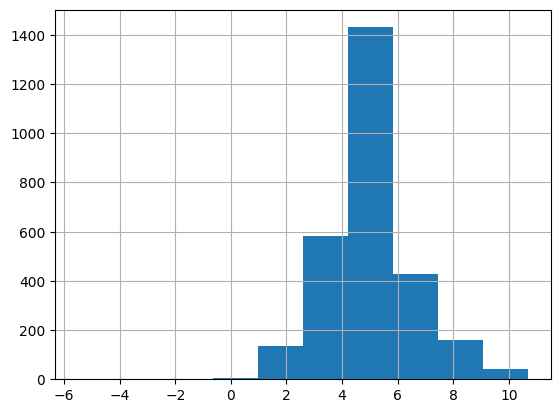

In [73]:
final_df.pchembl_value.hist()

In [74]:
final_df.gene_symbol.value_counts()

gene_symbol
ERG11      193
CYP3A4      77
HDAC6       61
ALB         58
PTGS1       58
          ... 
UGT2B10      1
UGT2B4       1
Slc22a7      1
Slc22a8      1
PRKDC        1
Name: count, Length: 663, dtype: int64

In [75]:
final_df.standard_type.value_counts()

standard_type
Tissue Severity Score        2900
MIC                          2772
IC50                         2437
Activity                     2328
Ki                           1580
                             ... 
Anticonvulsant activity         1
RM                              1
Incidence of RBC decrease       1
Protective index                1
PIC seizure                     1
Name: count, Length: 459, dtype: int64

In [76]:
final_df.standard_units.value_counts()

standard_units
%              8198
ug.mL-1        6223
nM             2805
cells.uL-1      956
g               819
               ... 
mmHg hr-1         1
ppm               1
mm2               1
10'7No_unit       1
nm/s              1
Name: count, Length: 136, dtype: int64